In [404]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 数据检视

In [405]:
#读取数据集
df = pd.read_csv('train_split.csv',index_col = None)
#查看数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  object 
 5   SSN                       23413 non-null  object 
 6   Occupation                23413 non-null  object 
 7   Annual_Income             23413 non-null  object 
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  int64  
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  object 
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

# 2. 数据清洗

## 2.1 缺失值，异常值 处理

### 1.Age
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 年龄必须大于0且小于100 数据集中出现大量负数和大于100的值当作异常值处理
3. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [406]:
#Age

#将Age转化为String类型
df['Age'] = df['Age'].astype(str)

#将Age中的带'_'的值去除'_'
df['Age'] = df['Age'].str.replace('_', '')

#将Age变为int类型
df['Age'] = df['Age'].astype(pd.Int64Dtype())

#将Age中小于等于0和超过100的值替换为NaN
df['Age'] = df['Age'].where(df['Age'] <= 100, np.nan)
df['Age'] = df['Age'].where(df['Age'] > 0, np.nan)

df['Age']

0        18
1        31
2        37
3        33
4        18
         ..
23408    38
23409    37
23410    33
23411    32
23412    41
Name: Age, Length: 23413, dtype: Int64

### 2. Occupation
1. "_______"是一个缺失值
    使用正则匹配的方式，替换成NaN

In [407]:
#Occupation

#将Occupation中全为若干个'_'组成的值替换为NaN
df['Occupation'].replace('^_+$', np.nan, regex=True, inplace=True)

df['Occupation']

0              Manager
1             Mechanic
2             Musician
3               Doctor
4           Journalist
             ...      
23408    Media_Manager
23409         Musician
23410          Teacher
23411           Doctor
23412           Lawyer
Name: Occupation, Length: 23413, dtype: object

### 3. Annual_Income
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（保留两位小数）（由于数据集中存在字符串由pandas读入类型为object）

In [408]:
#Annual_Income

#将Annual_Income转化为String类型
df['Annual_Income'] = df['Annual_Income'].astype(str)

#将Annual_Income中的带'_'的值去除'_'
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

#将Annual_Income变为float类型并保留两位小数
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'] = df['Annual_Income'].round(2)
df['Annual_Income']

0         31633.54
1         33446.44
2         21212.42
3         60938.13
4         73057.16
           ...    
23408     57810.68
23409     15597.31
23410    179948.84
23411      7821.24
23412     20889.65
Name: Annual_Income, Length: 23413, dtype: float64

### 4. Monthly_Inhand_Salary

In [409]:
#Monthly_Inhand_Salary

#将Monthly_Inhand_Salary保留两位小数
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(2)

df['Monthly_Inhand_Salary']

0         2930.13
1             NaN
2         1910.70
3         5163.18
4         5998.10
           ...   
23408     4896.56
23409     1456.78
23410    14836.74
23411      468.77
23412     1710.80
Name: Monthly_Inhand_Salary, Length: 23413, dtype: float64

### 5. Num_Bank_Accounts
1. 去除负数（账户数不可能为负数）
2. 怀疑过多的银行账户是异常值，计算超过num的值所占百分比
   在num = 20 时仍有 1.35%（大约315个人）
   认为是异常值

In [410]:
# 去除负数
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].where(df['Num_Bank_Accounts'] >= 0, np.nan)

In [411]:
# Num_Bank_Accounts
num = 20

# 计算 Num_Bank_Accounts中大于 num 的数据的个数
count = df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Bank_Accounts'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的人数：{count} , 占 {percentage:.2f}%')


大于 20 的人数：315 , 占 1.35%


In [412]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].where(df['Num_Bank_Accounts'] < 20, np.nan)

In [413]:
# 在数据预览时发现此行的Num_Credit_Card值为-1
x = df.loc[2334]
x
# 通过观察已成功改变

ID                                                    0xc7bd
Customer_ID                                       CUS_0x4f2a
Month                                                 August
Name                                               Margaretf
Age                                                       40
SSN                                              807-03-5415
Occupation                                          Engineer
Annual_Income                                     22136920.0
Monthly_Inhand_Salary                                    NaN
Num_Bank_Accounts                                        NaN
Num_Credit_Card                                            6
Interest_Rate                                              1
Num_of_Loan                                                2
Type_of_Loan                    Auto Loan, and Not Specified
Delay_from_due_date                                       10
Num_of_Delayed_Payment                                     6
Changed_Credit_Limit    

### 6. Num_Credit_Card
1. 去除负数（信用卡数不可能为负数）
2. 怀疑过多的信用卡数是异常值，计算超过num的值所占百分比
   在num = 20 时仍有0.82%（大约191个人）
   查找资料发现美国银行数有5000家以上
   综上，认为是合理的，不予处理

In [414]:
# 去除负数
df['Num_Credit_Card'] = df['Num_Credit_Card'].where(df['Num_Credit_Card'] >= 0, np.nan)

In [415]:
#Num_Credit_Card
num = 1000

# 计算 Num_Bank_Accounts中大于 20 的数据的个数
count = df['Num_Credit_Card'][df['Num_Credit_Card'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Credit_Card'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的人数：{count} , 占 {percentage:.2f}%')

大于 1000 的人数：193 , 占 0.82%


In [416]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].where(df['Num_Credit_Card'] <20, np.nan)

### 7. Interest_Rate
1. 怀疑超过100是异常值,但是经过统计
   人数： 469
   大于 100 的数据占 2.00%
   暂时不予处理

In [417]:
# Interest_Rate

num = 100

# 计算 Interest_Rate中大于 100 的数据的个数
count = df['Interest_Rate'][df['Interest_Rate'] > num].count()

# 计算 Interest_Rate中数据的总个数
total = df['Interest_Rate'].count()
print(f'人数： {count}')
# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')


人数： 469
大于 100 的数据占 2.00%


### 8. Num_of_Loan
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 贷款数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
3. 怀疑大于10的值为异常值，通过与Type_of_Loan对应，发现过大的Num_of_Loan是异常值，替换为NaN
4. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [418]:
# Num_of_Loan

#将Num_of_Loan转化为String类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str)

#将Age中的带'_'的值去除'_'
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

#将Num_of_Loan变为int类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(pd.Int64Dtype())

#将Num_of_Loan中小于0值替换为NaN
df['Num_of_Loan'] = df['Num_of_Loan'].where(df['Num_of_Loan'] >= 0 , np.nan)
df['Num_of_Loan'] = df['Num_of_Loan'].where(df['Num_of_Loan'] <= 10, np.nan)
df['Num_of_Loan']



0        3
1        6
2        4
3        8
4        2
        ..
23408    4
23409    5
23410    3
23411    6
23412    5
Name: Num_of_Loan, Length: 23413, dtype: Int64

In [419]:
x = df.loc[487]
x

ID                                                                    0x17866
Customer_ID                                                        CUS_0xab37
Month                                                                     May
Name                                                             Tarmo Virkip
Age                                                                        42
SSN                                                               619-06-3124
Occupation                                                             Lawyer
Annual_Income                                                         70956.8
Monthly_Inhand_Salary                                                 6064.07
Num_Bank_Accounts                                                         6.0
Num_Credit_Card                                                           6.0
Interest_Rate                                                            2278
Num_of_Loan                                                     

In [420]:
# 查看 Num_of_Loan 大于等于 200 的行
# 筛选条件
condition = df['Num_of_Loan'] >= 200

# 应用筛选条件并获取符合条件的行数据
filtered_data = df[condition]

filtered_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [421]:
# 查看 Num_of_Loan 的中位数和众数
# 获取列的众数
mode = df['Num_of_Loan'].mode()
print("Mode:")
print(mode)

# 获取列的中位数
median = df['Num_of_Loan'].median()
print("Median:")
print(median)


Mode:
0    2
Name: Num_of_Loan, dtype: Int64
Median:
4.0


### 9. Type_of_Loan


In [422]:
# Type_of_Loan

### 10. Delay_from_due_date
1.  从付款日期延迟的平均天数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN

In [423]:
# Delay_from_due_date

# 将Delay_from_due_date中小于0值替换为NaN
df['Delay_from_due_date'] = df['Delay_from_due_date'].where(df['Delay_from_due_date'] >= 0, np.nan)

### 11. Num_of_Delayed_Payment
1. 延迟付款次数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
2. 将带有若干'_'的值去除所有'_'，保留数字

In [424]:
# Num_of_Delayed_Payment

# 将 NaN 替换为 -1
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(-1)

# 将Num_of_Delayed_Payment转化为String类型
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)

# Num_of_Delayed_Payment中的带'_'的值去除'_'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

# 将Num_of_Delayed_Payment中小于0值替换为NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].where(df['Num_of_Delayed_Payment'] >= 0, np.nan)

### 12. Changed_Credit_Limit
1. 将为'_'的值替换为NaN
2. 检查数据发现所有数据绝对值都在100以内，不予处理
3. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [425]:
# Changed_Credit_Limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

### 13. Num_Credit_Inquiries

In [426]:
# Num_Credit_Inquiries

### 14. Credit_Mix
1. 将为'_'的值替换为NaN

In [427]:
# Credit_Mix

df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)



### 15. Outstanding_Debt
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [428]:
# Outstanding_Debt

# 将Outstanding_Debt转化为String类型
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)

# Outstanding_Debt中的带'_'的值去除'_'
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

### 16. Credit_Utilization_Ratio

In [429]:
# Credit_Utilization_Ratio

### 17. Credit_History_Age

In [430]:
# Credit_History_Age

### 18. Payment_of_Min_Amount

In [431]:
# Payment_of_Min_Amount

### 19. Total_EMI_per_month

In [432]:
# Total_EMI_per_month

### 20. Amount_invested_monthly
1. 将'_10000_'替换为'10000'
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [433]:
# Amount_invested_monthly

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__','10000')

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

### 21. Payment_Behaviour
1. 将'!@9#%8'转换为NaN

In [434]:
# Payment_Behaviour

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

### 22. Monthly_Balance
1. 将'__-333333333333333333333333333__'转换为NaN
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [435]:
# Monthly_Balance

df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

### 23. Credit_Score

In [436]:
# Credit_Score

In [437]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data

,Total,Percent
Credit_Mix,4779,0.204117
Monthly_Inhand_Salary,3581,0.152949
Name,2394,0.102251
Type_of_Loan,2394,0.102251
Credit_History_Age,2143,0.091530
Num_of_Delayed_Payment,1829,0.078119
Payment_Behaviour,1764,0.075343
Occupation,1638,0.069961
Amount_invested_monthly,1109,0.047367
Num_of_Loan,1078,0.046043


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       22741 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                21775 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23089 non-null  float64
 10  Num_Credit_Card           22899 non-null  float64
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               22335 non-null  Int64  
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

In [439]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Good,846.45,37.934665,22 Years and 2 Months,No,50.768440,275.759795,Low_spent_Medium_value_payments,246.484598,Poor
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,NaN,6.0,...,NaN,2953.68,37.895848,9 Years and 7 Months,Yes,133.355905,93.650442,Low_spent_Large_value_payments,348.813987,Poor
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,NaN,479.83,36.491037,23 Years and 1 Months,No,50.305036,172.477693,Low_spent_Large_value_payments,238.287438,Good
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Bad,3947.24,21.744884,4 Years and 10 Months,Yes,378.304673,166.487676,High_spent_Small_value_payments,231.525401,Poor
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Standard,2569.09,27.350833,9 Years and 6 Months,Yes,91.354188,66.232154,High_spent_Medium_value_payments,692.223325,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,1419.99,27.141606,30 Years and 4 Months,No,131.871482,416.933866,Low_spent_Small_value_payments,230.850318,Good
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Standard,741.46,32.418000,5 Years and 6 Months,Yes,45.804440,142.100773,Low_spent_Medium_value_payments,237.772370,Good
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Good,1104.31,31.508604,31 Years and 8 Months,No,446.259347,10000.000000,Low_spent_Large_value_payments,309.497362,Poor
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Bad,2924.76,33.575214,10 Years and 3 Months,Yes,19.727923,20.269324,Low_spent_Medium_value_payments,286.879752,Poor


## 2.2 缺失值，异常值填充

### 2.2.1 数值属性处理

绘制数值属性的直方图以及核密度曲线

In [440]:
def plot_histogram_without_nan(column_name, data_frame):
    plt.figure(figsize=(8, 6))
    sns.histplot(data_frame[column_name].dropna(), kde=True)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column_name}')
    plt.show()

In [441]:
def print_messages(df,col):
    # 计算 col 列的缺失值个数
    missing = df[col].isnull().sum()
    print(f'缺失值数量 {missing}')

    # 计算 col 列的缺失值所占的比例
    percentage = missing / len(df) * 100
    print(f'缺失值所占比例为 {percentage:.2f}%')

    # 计算 col 列的统计信息，包括计数、均值、标准差、最小值、四分位数、最大值等
    stats = df[col].describe()
    print(stats)

    # 计算 col 列的众数，也就是出现次数最多的值
    mode = df[col].mode()
    print(mode)

In [442]:
# # 筛选出 int 和 float 类型的列
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns
#
# # 循环调用绘制密度曲线的函数
# for col in numeric_cols:
#     plot_histogram_without_nan(col, df)

#### 1. Age

缺失值数量 672
缺失值所占比例为 2.87%
count    22741.000000
mean        33.173475
std         10.735782
min         14.000000
25%         24.000000
50%         33.000000
75%         41.000000
max         99.000000
Name: Age, dtype: float64
0    28
Name: Age, dtype: Int64


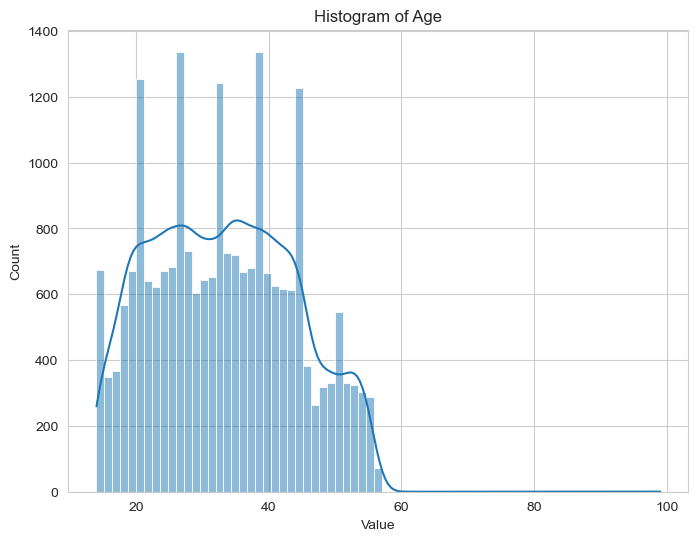

In [443]:
# 打印统计信息
print_messages(df,'Age')
plot_histogram_without_nan("Age", df)

In [444]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # 用中位数填充缺失值

#### 2. Annual Income

In [445]:
# 打印统计信息
print_messages(df,'Annual_Income')

缺失值数量 0
缺失值所占比例为 0.00%
count    2.341300e+04
mean     1.679657e+05
std      1.408502e+06
min      7.005930e+03
25%      1.877166e+04
50%      3.761254e+04
75%      7.095680e+04
max      2.391294e+07
Name: Annual_Income, dtype: float64
0     33832.58
1     40332.61
2     46855.17
3     54881.55
4    167753.52
Name: Annual_Income, dtype: float64


#### 3. Monthly_Inhand_Salary

缺失值数量 3581
缺失值所占比例为 15.29%
count    19832.000000
mean      4141.187072
std       3252.627057
min        319.560000
25%       1564.690000
50%       3080.560000
75%       5801.970000
max      15204.630000
Name: Monthly_Inhand_Salary, dtype: float64
0    1843.08
Name: Monthly_Inhand_Salary, dtype: float64


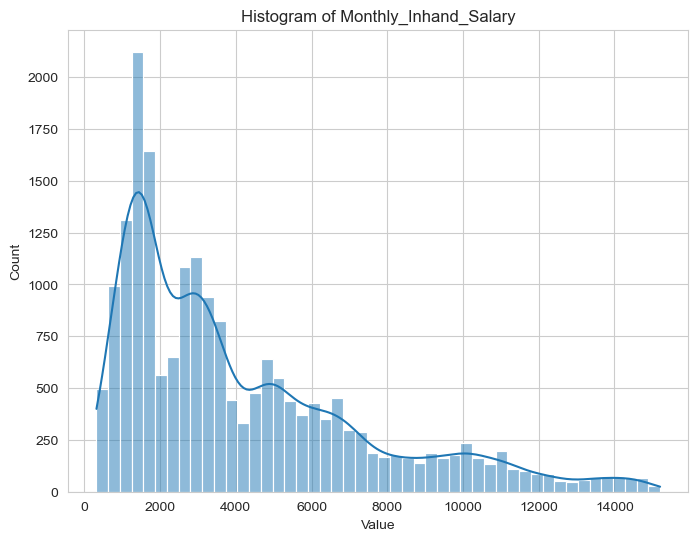

In [446]:
# 打印统计信息
print_messages(df,'Monthly_Inhand_Salary')
plot_histogram_without_nan("Monthly_Inhand_Salary", df)

In [447]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median()) # 用中位数填充缺失值

#### 4. Num_Bank_Accounts
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 324
缺失值所占比例为 1.38%
count    23089.000000
mean         5.372169
std          2.828542
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: Num_Bank_Accounts, dtype: float64
0    7.0
Name: Num_Bank_Accounts, dtype: float64


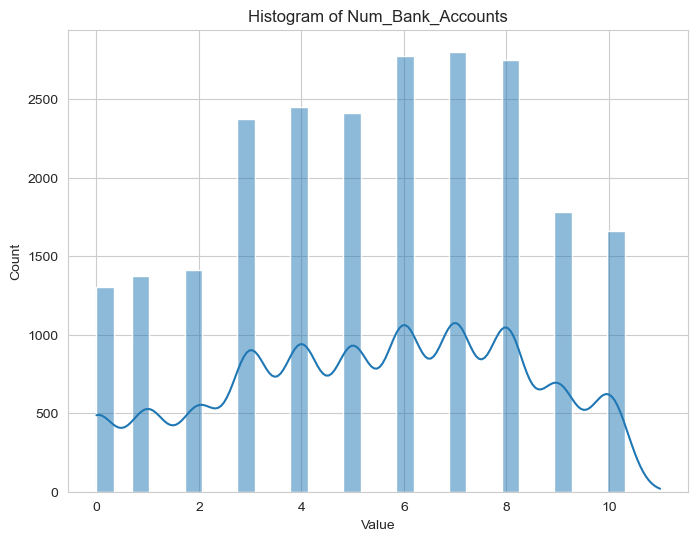

In [448]:
# 打印统计信息
print_messages(df,'Num_Bank_Accounts')
plot_histogram_without_nan("Num_Bank_Accounts", df)

In [449]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median()) # 用中位数填充缺失值

#### 5. Num_Credit_Card

In [450]:
print_messages(df,'Num_Credit_Card')

缺失值数量 514
缺失值所占比例为 2.20%
count    22899.000000
mean         5.681427
std          2.280115
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64
0    5.0
Name: Num_Credit_Card, dtype: float64


In [451]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(df['Num_Credit_Card'].median()) # 用中位数填充缺失值

#### 6. Interest_Rate


In [452]:
print_messages(df,'Interest_Rate')

缺失值数量 0
缺失值所占比例为 0.00%
count    23413.000000
mean        72.264298
std        460.147341
min          1.000000
25%          7.000000
50%         15.000000
75%         24.000000
max       5788.000000
Name: Interest_Rate, dtype: float64
0    8
Name: Interest_Rate, dtype: int64


#### 8. Num_of_Loan
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 1078
缺失值所占比例为 4.60%
count    22335.000000
mean         3.812760
std          2.516863
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: Num_of_Loan, dtype: float64
0    2
Name: Num_of_Loan, dtype: Int64


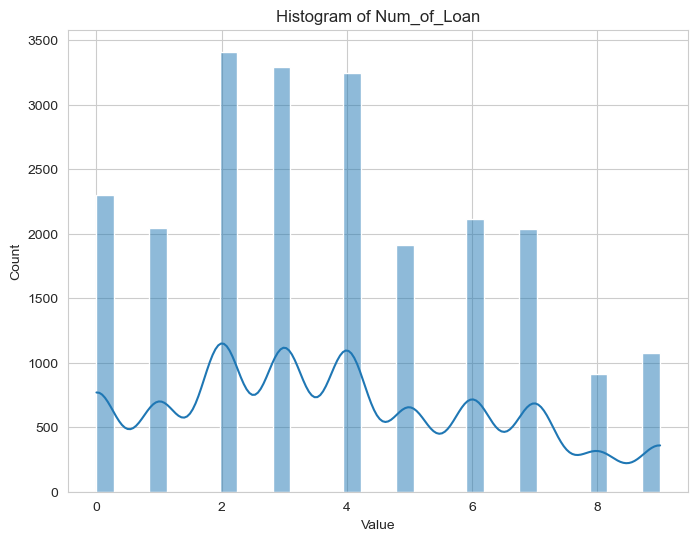

In [453]:
# 打印统计信息
print_messages(df,'Num_of_Loan')
plot_histogram_without_nan("Num_of_Loan", df)

In [454]:
# df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median()) # 用中位数填充缺失值

#### 9. Delay_from_due_date
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 201
缺失值所占比例为 0.86%
count    23212.000000
mean        22.748664
std         16.452230
min          0.000000
25%         10.000000
50%         19.000000
75%         31.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
0    15.0
Name: Delay_from_due_date, dtype: float64


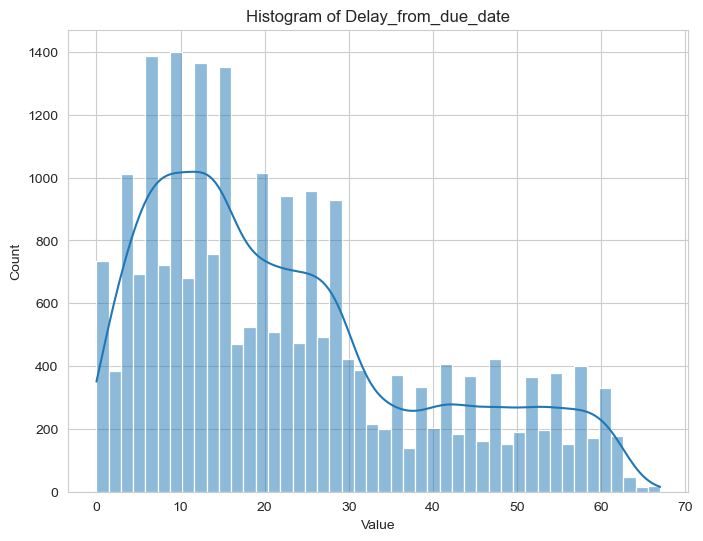

In [455]:
# 打印统计信息
print_messages(df,'Delay_from_due_date')
plot_histogram_without_nan("Delay_from_due_date", df)
df['Delay_from_due_date'] = df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].mean()) # 用均值填充缺失值

#### 10. Num_of_Delayed_Payment
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 1829
缺失值所占比例为 7.81%
count    21584.000000
mean        30.301937
std        223.628420
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max       4340.000000
Name: Num_of_Delayed_Payment, dtype: float64
0    10.0
Name: Num_of_Delayed_Payment, dtype: float64


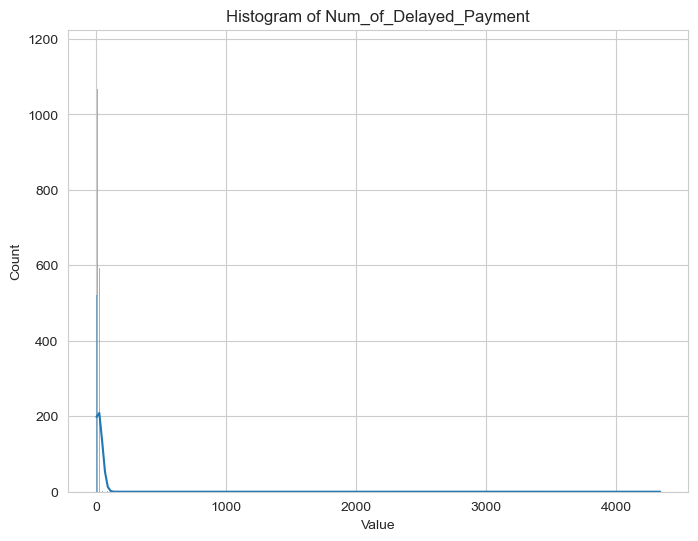

In [456]:
# 打印统计信息
print_messages(df,'Num_of_Delayed_Payment')
plot_histogram_without_nan("Num_of_Delayed_Payment", df)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median()) # 用中位数填充缺失值

#### 11. Changed_Credit_Limit
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 512
缺失值所占比例为 2.19%
count    22901.000000
mean         9.613264
std          6.711423
min         -6.490000
25%          4.600000
50%          8.590000
75%         13.170000
max         35.300000
Name: Changed_Credit_Limit, dtype: float64
0    9.25
Name: Changed_Credit_Limit, dtype: float64


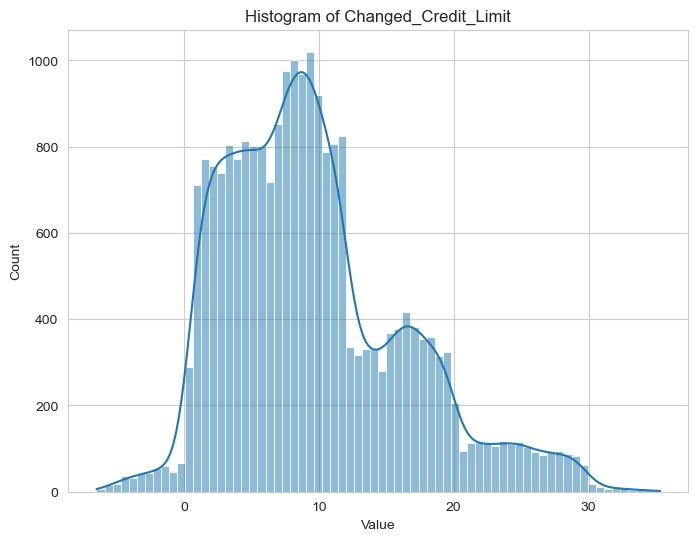

In [457]:
# 打印统计信息
print_messages(df,'Changed_Credit_Limit')
plot_histogram_without_nan("Changed_Credit_Limit", df)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean()) # 用均值填充缺失值

#### 12. Num_Credit_Inquiries
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 438
缺失值所占比例为 1.87%
count    22975.000000
mean        27.925223
std        191.189327
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max       2587.000000
Name: Num_Credit_Inquiries, dtype: float64
0    4.0
Name: Num_Credit_Inquiries, dtype: float64


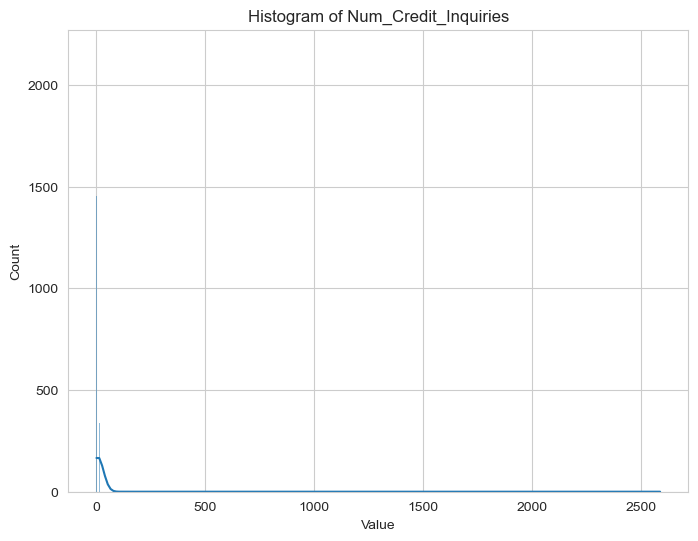

In [458]:
# 打印统计信息
print_messages(df,'Num_Credit_Inquiries')
plot_histogram_without_nan("Num_Credit_Inquiries", df)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median()) # 用中位数填充缺失值

#### 13. Amount_invested_monthly
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 1109
缺失值所占比例为 4.74%
count    22304.000000
mean       647.722515
std       2065.548914
min          0.000000
25%         73.726750
50%        134.355560
75%        264.106623
max      10000.000000
Name: Amount_invested_monthly, dtype: float64
0    10000.0
Name: Amount_invested_monthly, dtype: float64


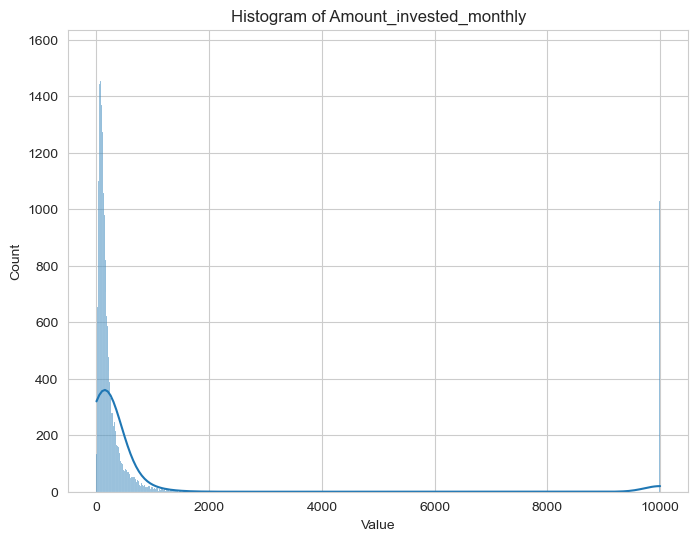

In [459]:
# 打印统计信息
print_messages(df,'Amount_invested_monthly')
plot_histogram_without_nan("Amount_invested_monthly", df)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median()) # 用中位数填充缺失值

#### 14. Monthly_Balance
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 289
缺失值所占比例为 1.23%
count    23124.000000
mean       395.057165
std        215.770507
min          0.095482
25%        266.143676
50%        328.424374
75%        454.959602
max       1602.040519
Name: Monthly_Balance, dtype: float64
0           0.095482
1           0.366147
2           0.419124
3           0.453456
4           0.503582
            ...     
23119    1528.744936
23120    1555.201051
23121    1558.421841
23122    1566.613165
23123    1602.040519
Name: Monthly_Balance, Length: 23124, dtype: float64


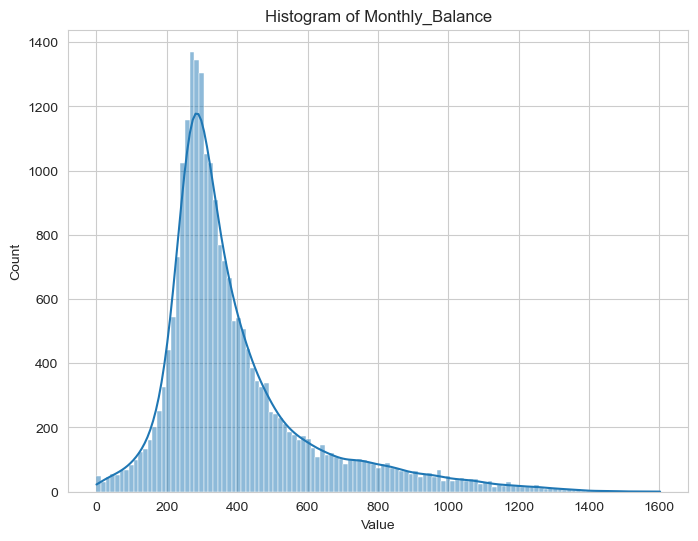

In [460]:
# 打印统计信息
print_messages(df,'Monthly_Balance')
plot_histogram_without_nan("Monthly_Balance", df)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean()) # 用均值填充缺失值

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                21775 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     23413 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  float64
 10  Num_Credit_Card           23413 non-null  float64
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               22335 non-null  Int64  
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

### 2.2 非数值属性处理


In [462]:
def count_and_fill_missing_values(dataframe, attribute_name, fill_value):
    # 统计缺失值数量
    missing_count = dataframe[attribute_name].isnull().sum()

    # 计算缺失值所占比例
    total_count = len(dataframe)
    missing_percentage = (missing_count / total_count) * 100

    # 填充缺失值
    dataframe[attribute_name].fillna(fill_value, inplace=True)

    print(f"缺失值有 {missing_count}, 所占比例 {missing_percentage:.2f}%")

    missing_count = dataframe[attribute_name].isnull().sum()
    print(f'填充后有 {missing_count} 个缺失值')

In [463]:
# 绘图函数
def plot_attribute_distribution(dataframe, attribute_name):
    # 统计每个属性的计数
    attribute_counts = pd.value_counts(dataframe[attribute_name])

    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    attribute_counts.plot(kind='bar')
    plt.xlabel(attribute_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attribute_name}')
    plt.show()

#### 1. Occupation

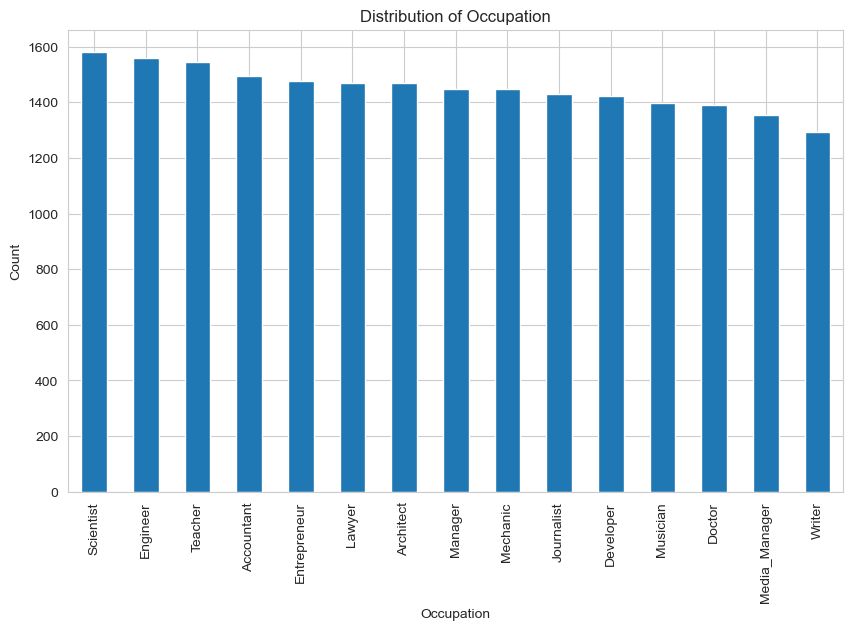

In [464]:
plot_attribute_distribution(df, "Occupation")

In [465]:
# 使用众数填充 NaN
count_and_fill_missing_values(df, "Occupation", "Scientist")

缺失值有 1638, 所占比例 7.00%
填充后有 0 个缺失值


#### 2. Type_of_Loan

In [466]:
# 统计缺失值数量
missing_count = df["Type_of_Loan"].isnull().sum()

# 计算缺失值所占比例
total_count = len(df)
missing_percentage = (missing_count / total_count) * 100

print(f"缺失值有 {missing_count}, 所占比例 {missing_percentage:.2f}%")

缺失值有 2394, 所占比例 10.23%


发现Num_of_Loan是0的时候，Type_of_Loan也是NaN, 那么这部分就是没有贷款的人，所以可以用0填充
而有些人有贷款，但是Type_of_Loan是NaN

In [467]:
# 创建新的一列
loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
              'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# 为每个贷款类型创建一列
for loan_type in loan_types:
    df[loan_type] = 0

# 遍历 Type_of_Loan 每一行
for index, row in df.iterrows():
    # 如果 Type_of_Loan 是 NaN, 则跳过
    if pd.isnull(row['Type_of_Loan']):
        continue
    type_of_loan = row['Type_of_Loan'].replace('and ', '').split(', ')
    # 对 Num_of_Loan 处理
    if pd.isnull(row['Num_of_Loan']):
        df.at[index, 'Num_of_Loan'] = len(type_of_loan);

    # 对每个可能的值进行计数
    # 对每个可能的值进行计数
    for loan_type in type_of_loan:
        if loan_type in loan_types:
            df.at[index, loan_type] += 1


In [468]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Poor,0,1,0,0,1,0,0,1,0
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,3080.56,6.0,...,Poor,1,3,0,0,1,0,1,0,0
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,Good,1,0,0,0,0,0,0,2,1
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Poor,0,1,0,0,2,1,3,0,1
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Poor,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,0,0,0,1,1,0,2,0,0
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Good,0,1,0,1,1,1,0,1,0
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Poor,0,0,0,1,1,0,0,0,1
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Poor,1,0,0,1,1,0,1,2,0


缺失值数量 93
缺失值所占比例为 0.40%
count    23320.000000
mean         3.828087
std          2.507639
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: Num_of_Loan, dtype: float64
0    2
Name: Num_of_Loan, dtype: Int64


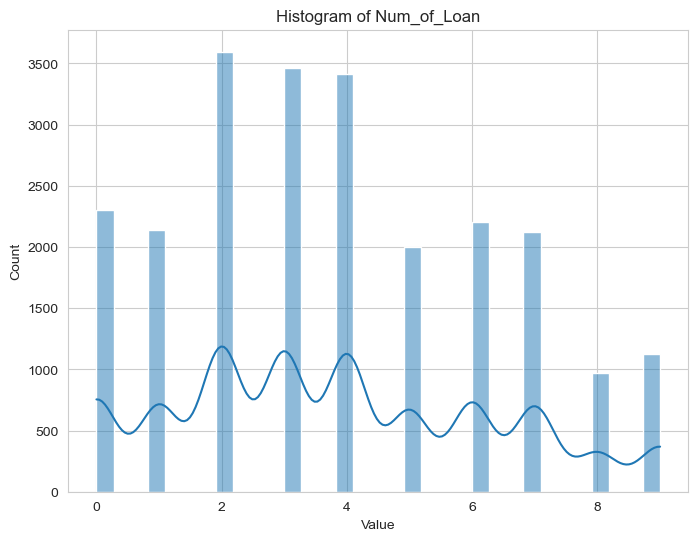

In [469]:
# 打印统计信息
print_messages(df,'Num_of_Loan')
plot_histogram_without_nan("Num_of_Loan", df)

In [470]:
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median()) # 用中位数填充缺失值

In [471]:
df['Num_of_Loan'].mean()

3.8287703412634007

In [472]:
# Type_of_Loan 每个可能值的平均数
for loan_type in loan_types:
    print(f"Average {loan_type} : {df[loan_type].mean()}")

Average Auto Loan : 0.4108401315508478
Average Credit-Builder Loan : 0.43650963140135823
Average Debt Consolidation Loan : 0.42104813565113397
Average Home Equity Loan : 0.41583735531542304
Average Mortgage Loan : 0.41993764148122836
Average Not Specified : 0.43048733609533163
Average Payday Loan : 0.4402255157391193
Average Personal Loan : 0.4103703070943493
Average Student Loan : 0.4276256780421134


选择前四进行填充 ：  Payday Loan, Not Specified, Credit-Builder Loan, Student Loan

In [473]:
# 找到Type_of_Loan列中值为NaN的行
nan_rows = df[df['Type_of_Loan'].isnull()]

# 对每个是NaN的行进行处理
for index, row in nan_rows.iterrows():
    num_of_loan = row['Num_of_Loan']

    if num_of_loan != 0:
        # 将指定列+1
        columns_to_increment = ['Payday Loan', 'Not Specified', 'Credit-Builder Loan', 'Student Loan']
        df.loc[index, columns_to_increment] += 1

df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Poor,0,1,0,0,1,0,0,1,0
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,3080.56,6.0,...,Poor,1,3,0,0,1,0,1,0,0
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,Good,1,0,0,0,0,0,0,2,1
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Poor,0,1,0,0,2,1,3,0,1
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Poor,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,0,0,0,1,1,0,2,0,0
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Good,0,1,0,1,1,1,0,1,0
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Poor,0,0,0,1,1,0,0,0,1
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Poor,1,0,0,1,1,0,1,2,0


In [474]:
df = df.drop(['Type_of_Loan'], axis=1)

In [475]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Poor,0,1,0,0,1,0,0,1,0
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,3080.56,6.0,...,Poor,1,3,0,0,1,0,1,0,0
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,Good,1,0,0,0,0,0,0,2,1
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Poor,0,1,0,0,2,1,3,0,1
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Poor,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,0,0,0,1,1,0,2,0,0
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Good,0,1,0,1,1,1,0,1,0
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Poor,0,0,0,1,1,0,0,0,1
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Poor,1,0,0,1,1,0,1,2,0


#### 3. Credit_Mix

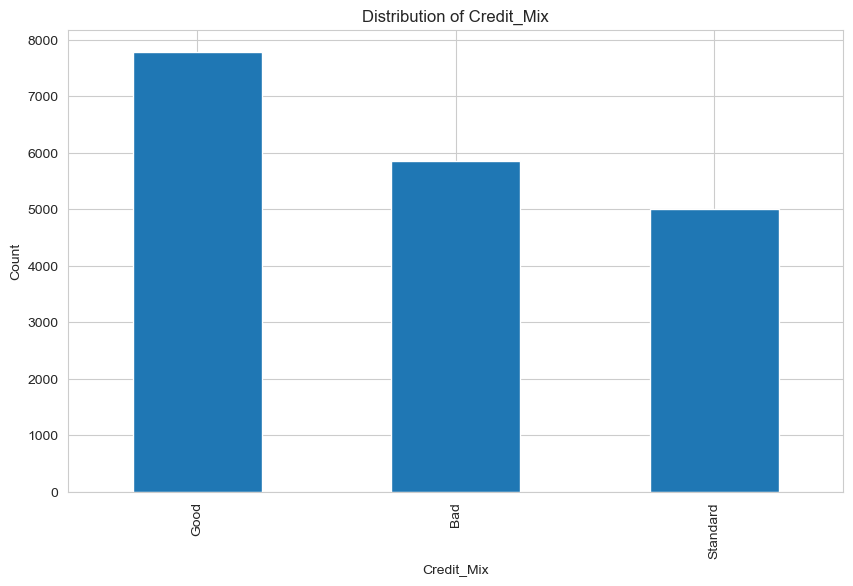

In [476]:
plot_attribute_distribution(df, "Credit_Mix")

In [477]:
count_and_fill_missing_values(df, "Credit_Mix", "Good")

缺失值有 4779, 所占比例 20.41%
填充后有 0 个缺失值


#### 4. Credit_History_Age
1. 将Credit_History_Age转换成月数（float类型）
2. 根据直方图和核密度曲线， 使用均值填充NaN

In [478]:
import re

# 将Credit_History_Age转换成月数（float类型）
pattern = r"(\d+) Years and (\d+) Months"
# 不删除含有NaN值的行，但也不对它们应用正则表达式
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(pattern).apply(lambda x: int(x[0]) * 12 + int(x[1]) if pd.notnull(x[0]) and pd.notnull(x[1]) else x[0], axis=1)


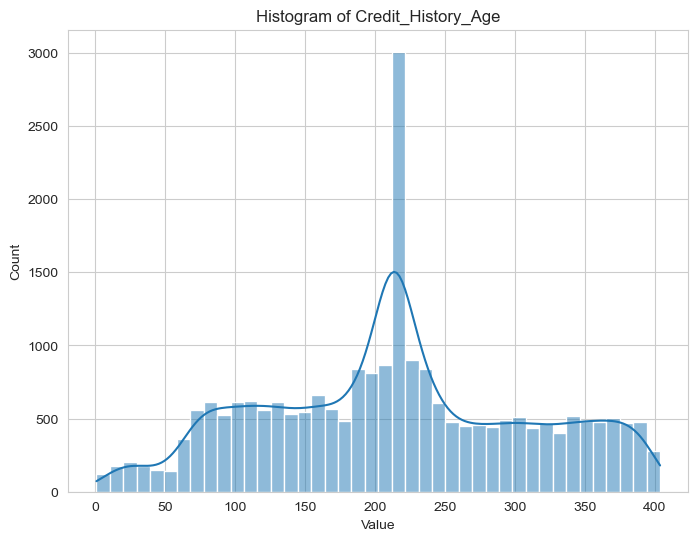

缺失值数量 0
缺失值所占比例为 0.00%
count    23413.000000
mean       213.490926
std         94.831951
min          1.000000
25%        143.000000
50%        213.490926
75%        281.000000
max        404.000000
Name: Credit_History_Age, dtype: float64
0    213.490926
Name: Credit_History_Age, dtype: float64


In [479]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean()) # 用均值填充缺失值
plot_histogram_without_nan("Credit_History_Age", df)
print_messages(df,'Credit_History_Age')

#### 5. Payment_Behaviour

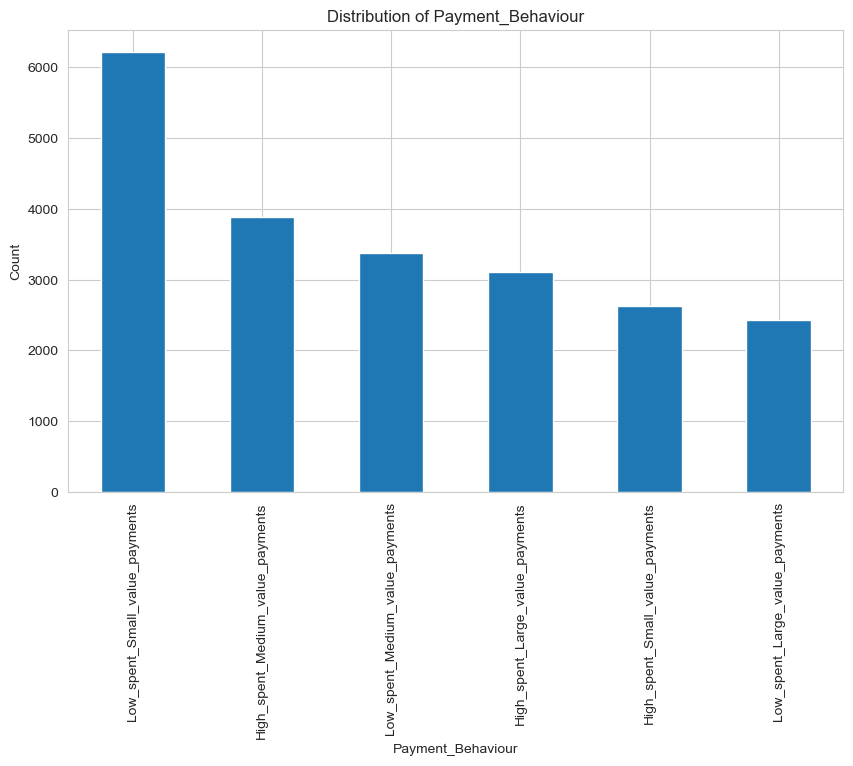

In [480]:
plot_attribute_distribution(df, "Payment_Behaviour")

In [481]:
count_and_fill_missing_values(df, "Payment_Behaviour", "Low_spent_Small_value_payments")

缺失值有 1764, 所占比例 7.53%
填充后有 0 个缺失值


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                23413 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     23413 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  float64
 10  Num_Credit_Card           23413 non-null  float64
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  Int64  
 13  Delay_from_due_date       23413 non-null  float64
 14  Num_of

In [483]:
# import pandas_profiling as ppf
# profile = ppf.ProfileReport(df)
# profile.to_file(output_file="output.html")

## 3. 特征工程

In [484]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder                    #标签编码
from sklearn.preprocessing import RobustScaler, StandardScaler    #去除异常值与数据标准化
from sklearn.pipeline import Pipeline, make_pipeline              #构建管道
from scipy.stats import skew                                 #偏度
from scipy.special import boxcox1p                           # box-cox变换
from sklearn.decomposition import PCA

##  3.1 特征选择

In [485]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN']
df = df_dropped = df.drop(columns=columns_to_drop)


## 3.2 顺序特征编码

In [486]:
# Credit_Mix 顺序特征编码
np.unique(df['Credit_Mix'])

array(['Bad', 'Good', 'Standard'], dtype=object)

In [487]:
def Credit_Mix_map(x):
    if x == 'Good':
        return 3
    elif x == 'Standard':
        return 2
    elif x == 'Bad':
        return 1
    else:
        return -1

In [488]:
df['Credit_Mix'] = df['Credit_Mix'].apply(Credit_Mix_map)
df['Credit_Mix']

0        3
1        3
2        3
3        1
4        2
        ..
23408    3
23409    2
23410    3
23411    1
23412    3
Name: Credit_Mix, Length: 23413, dtype: int64

## 3.3 二元属性特征编码

In [489]:
def Credit_Score_map(x):
    if x == 'Poor':
        return 0
    elif x == 'Good':
        return 1
    else:
        return None

df['Credit_Score'] = df['Credit_Score'].apply(Credit_Score_map)
df['Credit_Score']

0        0
1        0
2        1
3        0
4        0
        ..
23408    1
23409    1
23410    0
23411    0
23412    0
Name: Credit_Score, Length: 23413, dtype: int64

## 3.4 One-Hot编码

In [490]:
df = pd.get_dummies(df)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,18,31633.54,2930.13,1.0,5.0,8,3,6.0,6.0,12.70,...,0,0,1,0,0,0,0,0,1,0
1,31,33446.44,3080.56,6.0,6.0,24,6,21.0,19.0,22.45,...,0,0,0,1,0,0,0,1,0,0
2,37,21212.42,1910.70,1.0,4.0,12,4,6.0,14.0,3.08,...,0,0,1,0,0,0,0,1,0,0
3,33,60938.13,5163.18,10.0,8.0,31,8,24.0,18.0,12.49,...,0,0,0,1,0,0,1,0,0,0
4,18,73057.16,5998.10,4.0,6.0,32,2,24.0,14.0,10.00,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,38,57810.68,4896.56,7.0,5.0,7,4,29.0,16.0,7.37,...,0,0,1,0,0,0,0,0,0,1
23409,37,15597.31,1456.78,8.0,5.0,9,5,15.0,19.0,11.30,...,0,0,0,1,0,0,0,0,1,0
23410,33,179948.84,14836.74,0.0,5.0,4,3,30.0,0.0,-4.65,...,0,0,1,0,0,0,0,1,0,0
23411,32,7821.24,468.77,8.0,6.0,29,6,62.0,17.0,19.34,...,0,0,0,1,0,0,0,0,1,0


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 23413 non-null  Int64  
 1   Annual_Income                                       23413 non-null  float64
 2   Monthly_Inhand_Salary                               23413 non-null  float64
 3   Num_Bank_Accounts                                   23413 non-null  float64
 4   Num_Credit_Card                                     23413 non-null  float64
 5   Interest_Rate                                       23413 non-null  int64  
 6   Num_of_Loan                                         23413 non-null  Int64  
 7   Delay_from_due_date                                 23413 non-null  float64
 8   Num_of_Delayed_Payment                              23413 non-null  float64


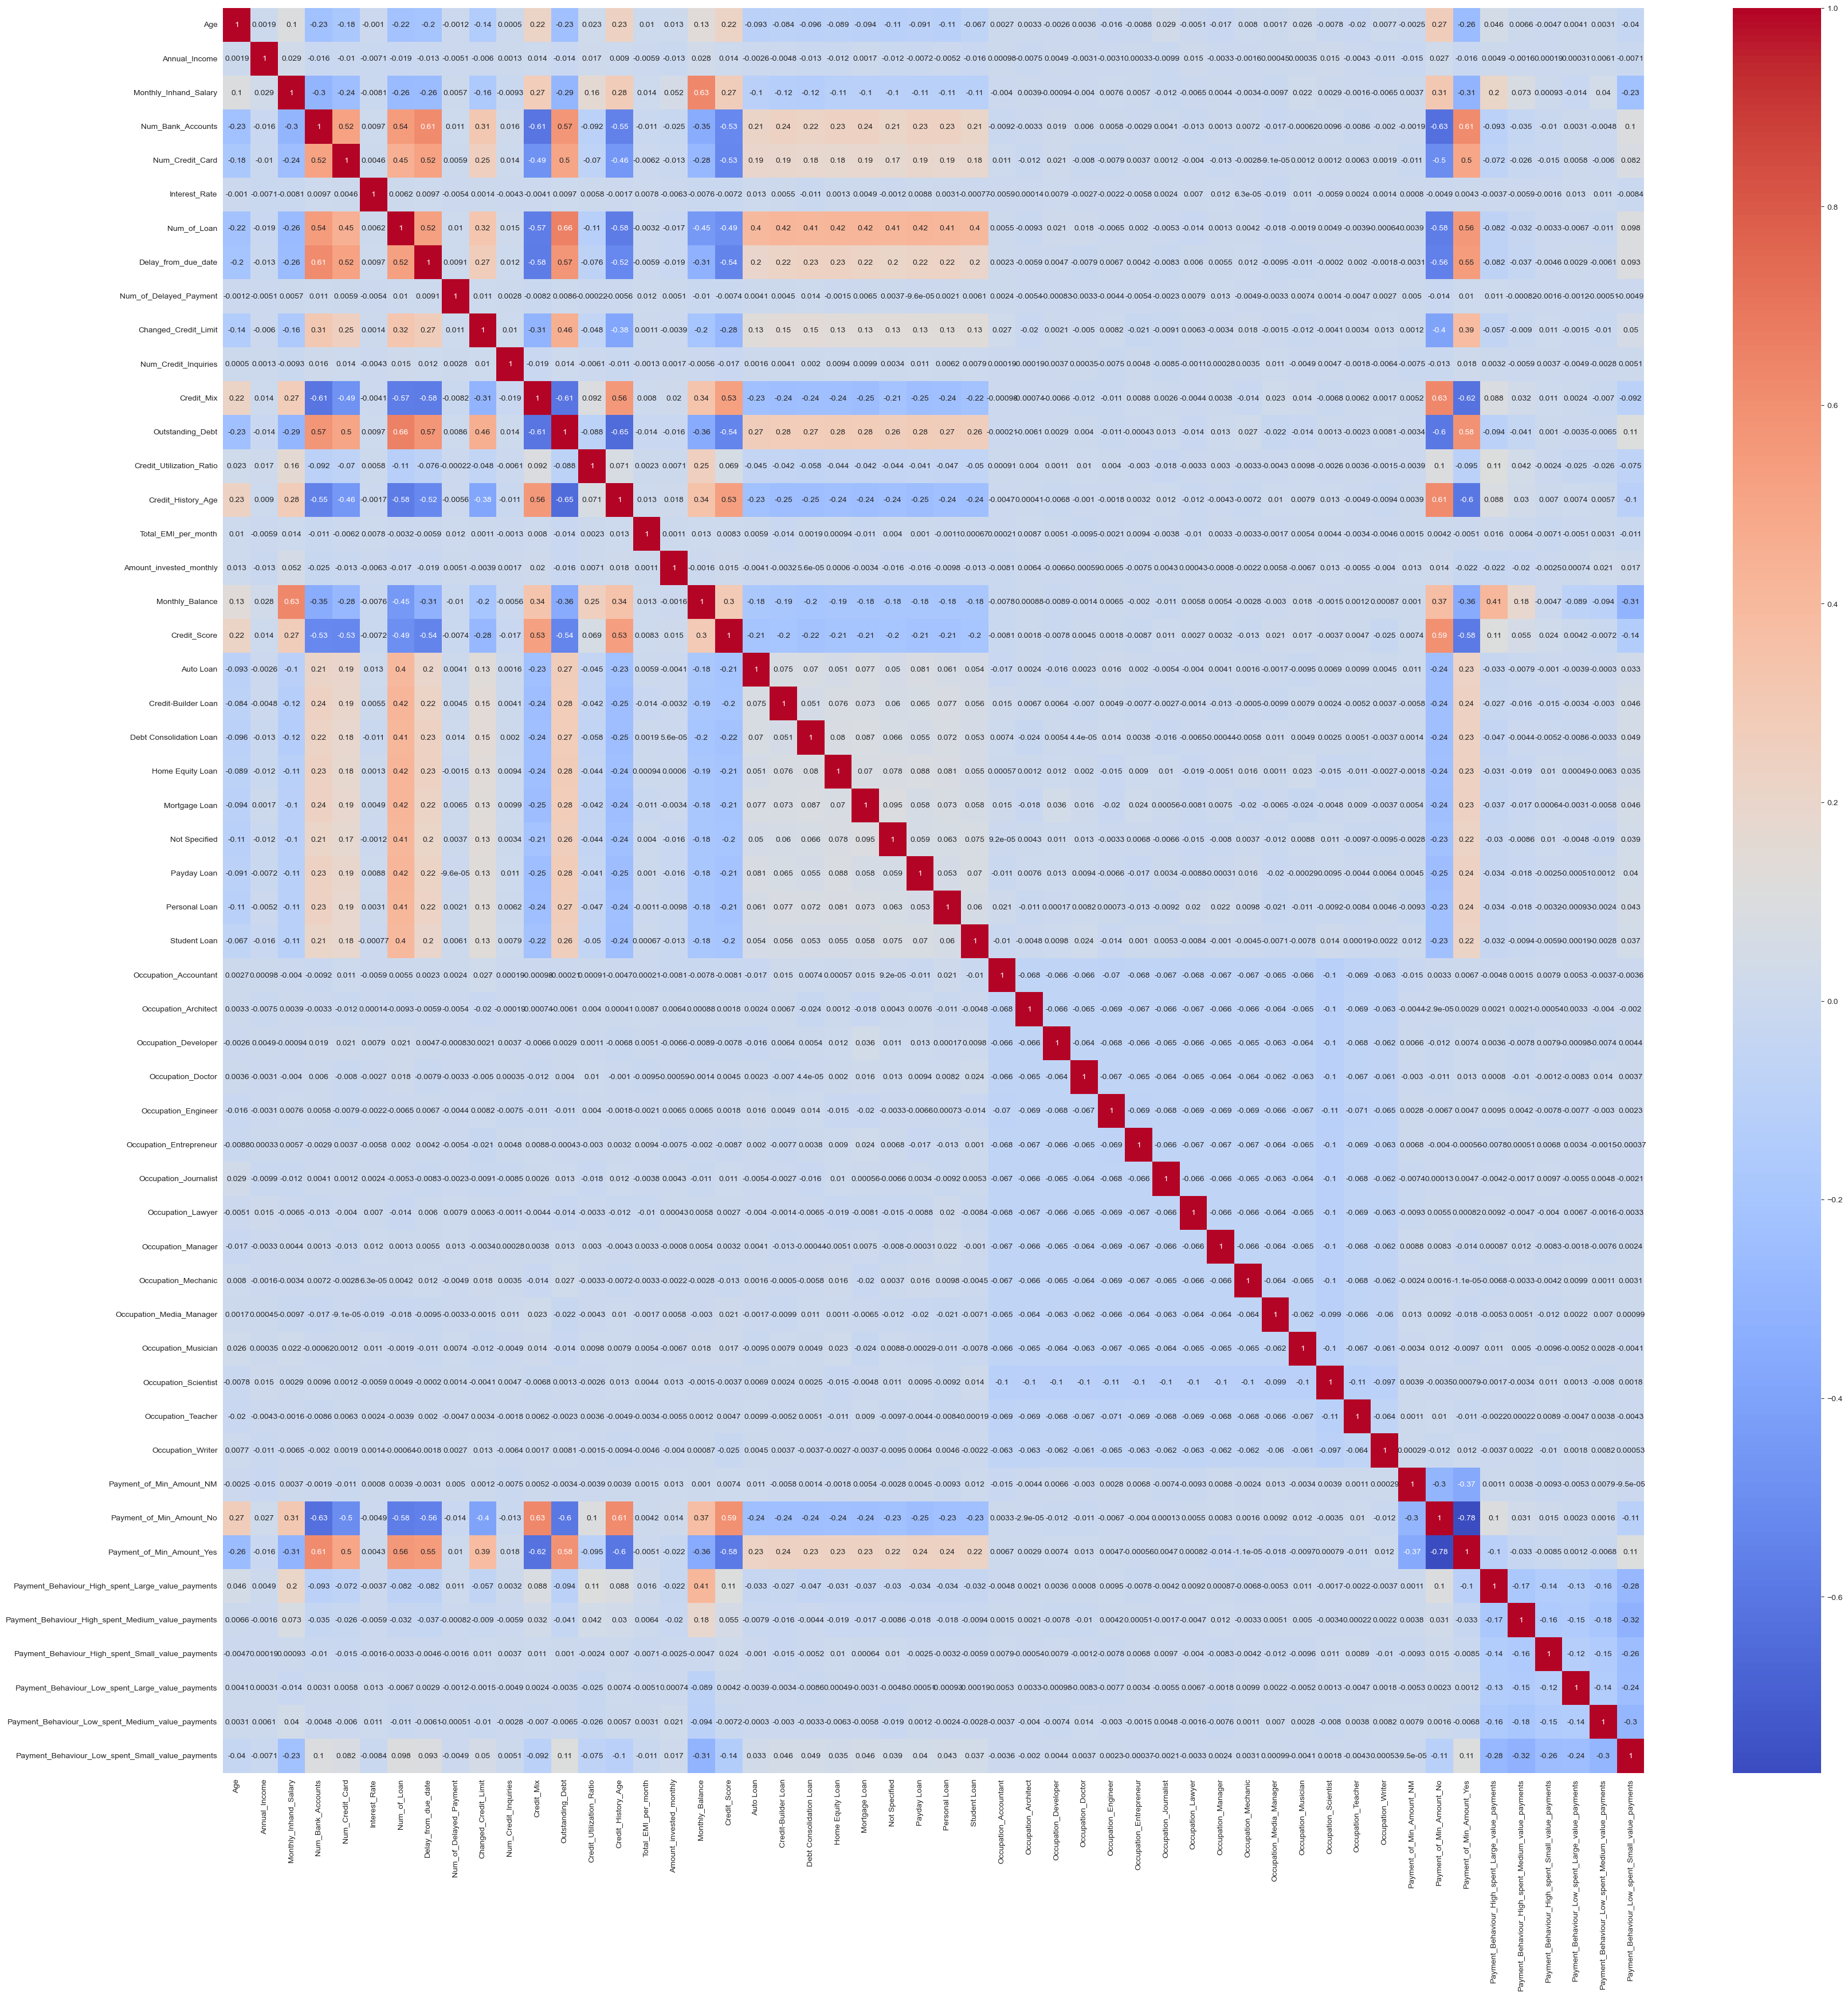

In [492]:
# 设置颜色风格为"whitegrid"
sns.set_style("whitegrid")

plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [493]:
# 相关性很低的特征
# columns_to_drop = ["Num_Bank_Accounts", "Num_Credit_Card","Interest_rate", "Num_of_Loan", "Num_of_Delayed_Payment", "Num_credit_Inquires" ]
columns_to_drop = ["Annual_Income"]
df = df_dropped = df.drop(columns=columns_to_drop)

In [494]:
# 获取要移动的列
column_to_move = df["Credit_Score"]

# 删除要移动的列
df = df.drop("Credit_Score", axis=1)

# 将要移动的列添加到 DataFrame 的最后一列
df["Credit_Score"] = column_to_move

df.head(10)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,18,2930.13,1.0,5.0,8,3,6.0,6.0,12.70,4.0,...,0,1,0,0,0,0,0,1,0,0
1,31,3080.56,6.0,6.0,24,6,21.0,19.0,22.45,13.0,...,0,0,1,0,0,0,1,0,0,0
2,37,1910.70,1.0,4.0,12,4,6.0,14.0,3.08,4.0,...,0,1,0,0,0,0,1,0,0,1
3,33,5163.18,10.0,8.0,31,8,24.0,18.0,12.49,9.0,...,0,0,1,0,0,1,0,0,0,0
4,18,5998.10,4.0,6.0,32,2,24.0,14.0,10.00,14.0,...,0,0,1,0,1,0,0,0,0,0
5,25,3157.56,2.0,6.0,7,2,19.0,14.0,7.68,3.0,...,0,1,0,0,0,0,0,0,1,0
6,29,4546.21,7.0,7.0,8,5,16.0,19.0,15.34,4.0,...,0,0,1,0,0,1,0,0,0,1
7,42,3080.56,4.0,5.0,19,2,18.0,9.0,16.50,9.0,...,1,0,0,0,0,0,0,0,1,0
8,34,7702.34,5.0,6.0,5,1,13.0,11.0,0.53,3.0,...,1,0,0,0,0,0,1,0,0,0
9,23,1747.66,6.0,10.0,29,6,27.0,20.0,3.87,10.0,...,0,0,1,0,0,0,0,0,1,0


In [495]:
import pandas_profiling as ppf
profile = ppf.ProfileReport(df)
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. 机器学习

In [496]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [497]:
# 创建一个XGBoost分类器对象，并设置相关参数：
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(
    max_depth=7,
    learning_rate=0.3,
    n_estimators=100,
    objective='binary:logistic'
)

In [498]:
xgb_classifier.fit(X_train, y_train) #训练

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [499]:
y_pred = xgb_classifier.predict(X_test) #预测

In [500]:
# 评估
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.48%
